### Самая общая формулировка модели:

$$\Delta Fx_t=\alpha^{s(t)} (a^{s(t)}Oil_{t-1} + b^{s(t)} - Fx_{t-1}) + \sum_{i=0}^{p}c^{s(t)}_i \Delta Oil_{t-i} + \sum_{j=1}^{q}d^{s(t)}_j \Delta Fx_{t-j} + \sigma \varepsilon(t)$$

$$P(s(t)=j \mid s(t-1)=i)=p_{ij}.$$

### То, что оценивали мы:

$$\Delta Fx_t=\alpha_{s(t)} (a_{s(t)}Oil_{t-1} + b_{s(t)} - Fx_{t-1}) + c_{s(t)}\Delta Oil_t + d_{s(t)}\Delta Oil_{t-1} + e_{s(t)}\Delta Fx_{t-1} + \sigma \varepsilon(t)$$

$$P(s(t)=j \mid s(t-1)=i)=p_{ij}.$$

In [ ]:
import datetime
now = datetime.datetime.now()
print(datetime.datetime.now())

2019-01-30 18:58:16.094197


In [ ]:
# Загрузка библиотек

import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter
from collections import defaultdict
from collections import namedtuple
import itertools
import seaborn as sns
# from seaborn import light_palette
#from scipy.ndimage.interpolation import shift
from IPython.display import clear_output
from IPython.display import display
from IPython.display import HTML
from IPython.display import Image

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn import preprocessing

import scipy
import scipy.stats as sp
import scipy.optimize as opt
from scipy.ndimage.interpolation import shift

import statsmodels.api as sm

import time

import gc

import copy

from ipywidgets import *

import warnings

import xlsxwriter

import contextlib

import tqdm
tqdm = tqdm.tqdm_notebook

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)

gc.enable()

plt.rc('font', family='Verdana')
    
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)
    
    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# sns.reset_orig()
%matplotlib inline

C:\Users\gpbu5947\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Загрузка данных

In [ ]:
raw_data = pd.read_csv('data.csv', 
                       delimiter=';', 
                       decimal='.',
                       encoding='CP1251')
raw_data['Date'] = pd.to_datetime(raw_data.Date, format = '%d.%m.%Y')
raw_data['dFx'] = raw_data.Fx - raw_data.Fx.shift(1)
raw_data['dOil'] = raw_data.Oil - raw_data.Oil.shift(1)
raw_data

,Date,Fx,Oil,dFx,dOil
0,1995-01-01,3.960432,10.996678,NaN,NaN
1,1995-02-01,3.916812,11.338635,-0.043621,0.341957
2,1995-03-01,3.848444,11.250000,-0.068367,-0.088635
3,1995-04-01,3.839022,12.285902,-0.009422,1.035902
4,1995-05-01,3.901569,12.064431,0.062546,-0.221471
5,1995-06-01,4.035656,11.358268,0.134087,-0.706164
6,1995-07-01,4.115290,10.386632,0.079635,-0.971636
7,1995-08-01,4.199755,10.529758,0.084465,0.143126
8,1995-09-01,4.222298,10.907903,0.022543,0.378145
9,1995-10-01,4.240607,10.495114,0.018309,-0.412789


так выглядят просто данные

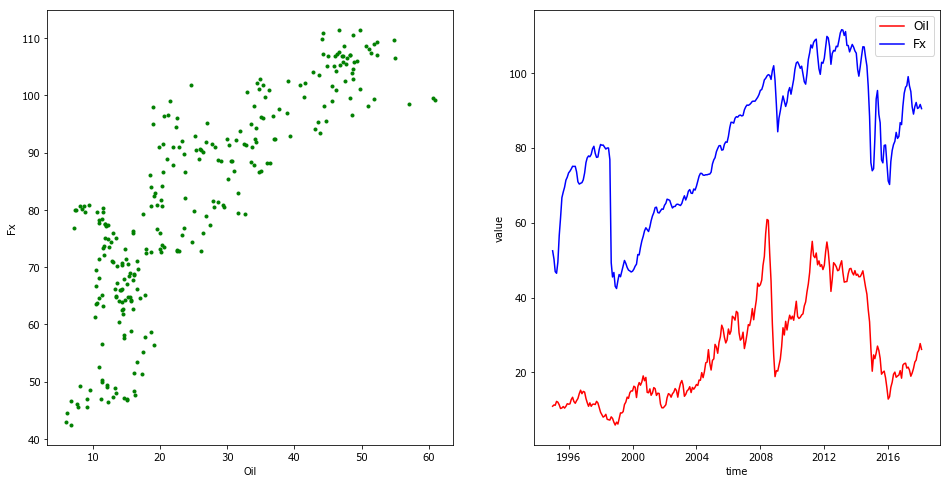

In [ ]:
plot_data = raw_data.copy()
plot_data.set_index('Date', inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
plt.figure(figsize=(8,8))
axes[0].plot(plot_data.Oil, plot_data.Fx,'g.')
axes[0].set_xlabel('Oil')
axes[0].set_ylabel('Fx')

axes[1].plot(plot_data.Oil, 'r-', label='Oil')
axes[1].plot(plot_data.Fx, 'b-', label='Fx')
axes[1].set_xlabel('time')
axes[1].set_ylabel('value')

axes[1].legend(loc=0, fontsize=12)

plt.show()

#### Пример: оценка одного тренда.

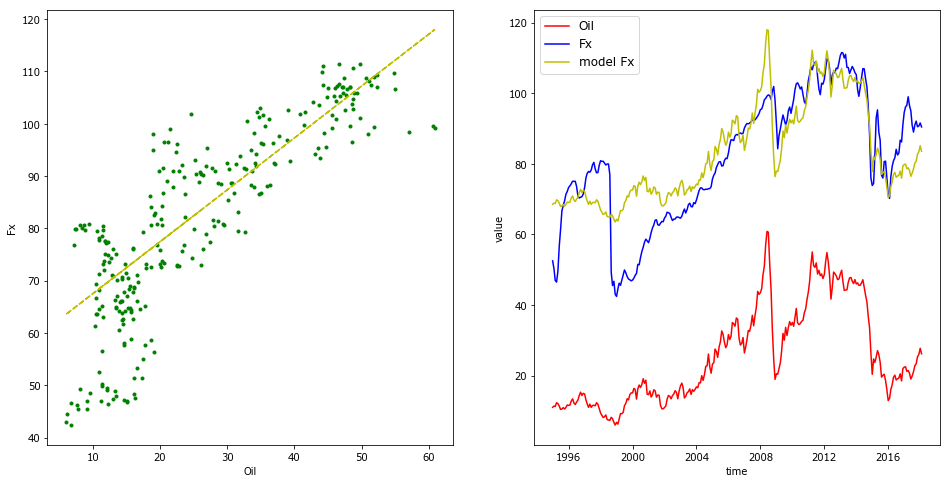

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     627.5
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           3.64e-64
Time:                        20:07:45   Log-Likelihood:                -702.11
No. Observations:                 206   AIC:                             1408.
Df Residuals:                     204   BIC:                             1415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.5812      1.309     43.987      0.000      55.000      60.162
x1             0.9925      0.040     25.051      0.000       0.914       1.071
==============================================================================
Omnibus:                        6.357   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.064
Skew:                           0.406   Prob(JB):                       0.0482
Kurtosis:                       3.220   Cond. No.                         84.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')
Y = np.array(raw_data.loc[ind1].Fx)
X = np.array(raw_data.loc[ind1].Oil)

lnr = sm.OLS(Y, sm.tools.add_constant(X))

lnr = lnr.fit()

plot_data = raw_data.copy()
plot_data.set_index('Date', inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
plt.figure(figsize=(8,8))
axes[0].plot(plot_data.Oil, plot_data.Fx,'g.')
axes[0].plot(plot_data.Oil, lnr.predict(sm.tools.add_constant(plot_data.Oil)),'y--')
axes[0].set_xlabel('Oil')
axes[0].set_ylabel('Fx')

axes[1].plot(plot_data.Oil, 'r-', label='Oil')
axes[1].plot(plot_data.Fx, 'b-', label='Fx')
axes[1].plot(lnr.predict(sm.tools.add_constant(plot_data.Oil)),'y-', label='model Fx')
axes[1].set_xlabel('time')
axes[1].set_ylabel('value')

axes[1].legend(loc=0, fontsize=12)

plt.show()

lnr.summary()

#### Поэтапное построение модели

На каждом этапе оценка происходила на двух временных горизонтах:
    - 2001-2014
    - 2001-2018
Чтобы удостовериться в стабильности результатов.
Далее, результаты предыдущего этапа использовались в качестве начальных условий для поиска параметров более сложной модели следующего этапа.

In [ ]:
methods = ['Nelder-Mead', 
#            'Powell',
           'CG',
           'BFGS',
           'L-BFGS-B',
           'TNC',
#            'COBYLA',
           'SLSQP']

##### Первый этап - 2 тренда. Оценки находятся методом наименьших квадратов.

In [ ]:
def model1(arr, X, Y):
    
    a_0 = arr[0]
    b_0 = arr[1]
    a_1 = arr[2]
    b_1 = arr[3]
    
    return np.sum(np.min(np.column_stack([(Y - a_0 * X - b_0)**2, (Y - a_1 * X - b_1)**2]), axis=1))

In [ ]:
ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')
ind2 = ind1 & (raw_data.Date <= pd.to_datetime('01.08.2014',  format = '%d.%m.%Y'))

def plot_trends(method, index):
    
    if index == '2001-2018':    
        Y = np.array(raw_data.loc[ind1].Fx)
        X = np.array(raw_data.loc[ind1].Oil)
        plot_data = raw_data[ind1].copy()
        plot_data.set_index('Date', inplace=True)
        
    if index == '2001-2014':
        Y = np.array(raw_data.loc[ind2].Fx)
        X = np.array(raw_data.loc[ind2].Oil)
        plot_data = raw_data[ind2].copy()
        plot_data.set_index('Date', inplace=True)

    rez = opt.minimize(model1,
                       [0.533239286, 78.12553073, 1.029270417, 51.54475881],
                       args=(X, Y),
                       method=method, jac=False,         
                       bounds=((0, None), 
                               (0, None), 
                               (0, None), 
                               (0, None)))

    print(rez)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    plt.figure(figsize=(8,8))
    axes[0].plot(plot_data.Oil, plot_data.Fx,'g.', label='real data')
    axes[0].plot(plot_data.Oil, plot_data.Oil * rez.x[0] + rez.x[1], 'r-', label = 'mode 0')
    axes[0].plot(plot_data.Oil, plot_data.Oil * rez.x[2] + rez.x[3], 'b-', label = 'mode 1')
    axes[0].set_xlabel('Oil')
    axes[0].set_ylabel('Fx')

    axes[0].legend(loc=0, fontsize=12)

    axes[1].plot(plot_data.Oil, 'r-', label='Oil')
    axes[1].plot(plot_data.Fx, 'b-', label='Fx')
    axes[1].set_xlabel('time')
    axes[1].set_ylabel('value')

    axes[1].legend(loc=0, fontsize=12)

    plt.show()

In [ ]:
# interact(plot_trends,
#          method=Dropdown(options=methods, value='L-BFGS-B',description='opyimization method:'), 
#          index=Dropdown(options=['2001-2018', '2001-2014'], value='2001-2018',description='data horizon:'))

      fun: 2943.282963000548
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01150511,  0.0003638 , -0.01909939, -0.00040927])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 200
      nit: 31
   status: 0
  success: True
        x: array([ 0.67289343, 74.08817179,  0.91082536, 53.65411807])


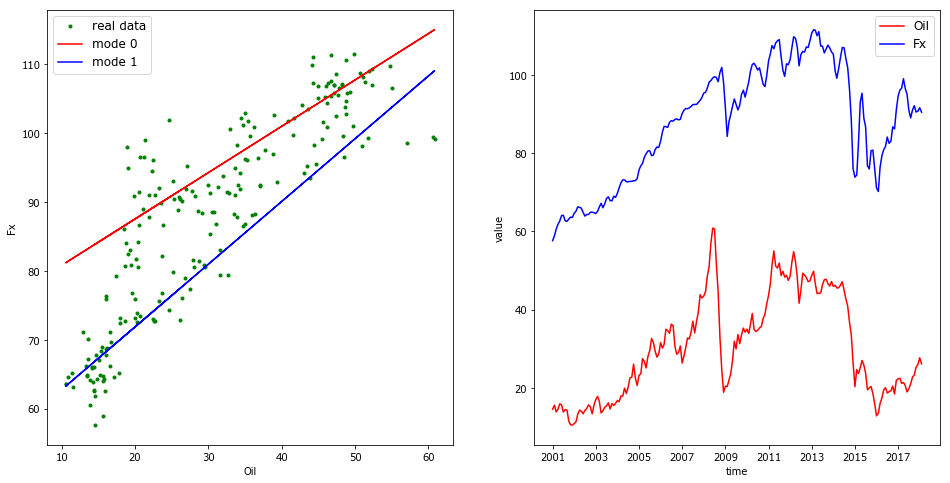

In [ ]:
plot_trends(method='L-BFGS-B', index='2001-2018')

тренды на данных 2001-2018 и 2001-2014

In [ ]:
names1 = ['a0', 'b0', 'a1', 'b1']

# print(names1)

ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')

Y = np.array(raw_data.loc[ind1].Fx)
X = np.array(raw_data.loc[ind1].Oil)

rez1_2001_2018 = opt.minimize(model1,
                             [0, 70, 1, 50],
                             args=(X, Y),
                             method='Nelder-Mead', jac=False)

# print(rez1_2001_2018.x)

ind2 = ind1 & (raw_data.Date <= pd.to_datetime('01.08.2014',  format = '%d.%m.%Y'))

Y = np.array(raw_data.loc[ind2].Fx)
X = np.array(raw_data.loc[ind2].Oil)

rez1_2001_2014 = opt.minimize(model1,
                             [0, 70, 1, 50],
                             args=(X, Y),
                             method='Nelder-Mead', jac=False)
# print(rez1_2001_2014.x)

pd.DataFrame(np.column_stack([rez1_2001_2018.x, rez1_2001_2014.x]), index=names1, columns=['2001-2018', '2001-2014'])

,2001-2018,2001-2014
a0,0.910827,0.932188
b0,53.654089,52.585146
a1,0.672893,0.684472
b1,74.088176,73.551467


##### Второй этап - переключение режимов для модели двух трендов. Оценки находятся методом максимального правдоподобия.

In [ ]:
def model2(arr, X, Y):
    
    a_0 = arr[0]
    b_0 = arr[1]
    a_1 = arr[2]
    b_1 = arr[3]
    p_01 = arr[4]
    p_10 = arr[5]
    
    sigma = arr[6]
    
    duration = len(Y)
    
    LF_i = np.zeros(duration)
    p = np.zeros(duration + 1)
    p[0] = 1
    
    f0 = sp.norm.pdf(Y - a_0 * X - b_0, 0, sigma)
    f1 = sp.norm.pdf(Y - a_1 * X - b_1, 0, sigma)
    
    for i in range(duration):
        
        p0 = p[i] * p_10 + (1-p[i]) * (1-p_01)
        p1 = p[i] * (1-p_10) + (1-p[i]) * p_01
        
        LF_i[i] = f0[i] * p0 + f1[i] * p1
        p[i + 1] = f1[i] * p1 / LF_i[i]
        
    return np.column_stack([LF_i, p[1:]])

def NLF_model2(arr, X, Y):
    return -np.log(model2(arr, X, Y)[:,0]).sum()

In [ ]:
ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')
ind2 = ind1 & (raw_data.Date <= pd.to_datetime('01.08.2014',  format = '%d.%m.%Y'))

def plot_modes(method, index, maxiter):
    
    if index == '2001-2018':    
        Y = np.array(raw_data.loc[ind1].Fx)
        X = np.array(raw_data.loc[ind1].Oil)
        plot_data = raw_data[ind1].copy()
        plot_data.set_index('Date', inplace=True)
        init_data = np.append(rez1_2001_2018.x, [0.01, 0.02, 1])
        
    if index == '2001-2014':
        Y = np.array(raw_data.loc[ind2].Fx)
        X = np.array(raw_data.loc[ind2].Oil)
        plot_data = raw_data[ind2].copy()
        plot_data.set_index('Date', inplace=True)
        init_data = np.append(rez1_2001_2014.x, [0.01, 0.02, 1])

    rez = opt.minimize(NLF_model2,
                       init_data,
                       args=(X, Y),
                       method=method, jac=False,         
                       bounds=((0, None), 
                               (0, None), 
                               (0, None), 
                               (0, None), 
                               (0, 1), 
                               (0, 1), 
                               (0, None)), 
                       options={'maxiter':maxiter})

    print(rez)

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    plt.figure(figsize=(8,8))
    axes[0].plot(plot_data.Oil, plot_data.Fx,'g.', label='real data')
    axes[0].plot(plot_data.Oil, plot_data.Oil * rez.x[0] + rez.x[1], 'r-', label = 'mode 0')
    axes[0].plot(plot_data.Oil, plot_data.Oil * rez.x[2] + rez.x[3], 'b-', label = 'mode 1')
    axes[0].set_xlabel('Oil')
    axes[0].set_ylabel('Fx')

    axes[0].legend(loc=0, fontsize=12)

    axes[1].plot(plot_data.Oil, 'r-', label='Oil')
    axes[1].plot(plot_data.Fx, 'b-', label='Fx')
    axes[1].set_xlabel('time')
    axes[1].set_ylabel('value')
    
    p1 = model2(rez.x, X, Y)[:,1]
    
    model_rez = ((1 - p1) * (plot_data.Oil * rez.x[0] + rez.x[1]) + 
                 p1 * (plot_data.Oil * rez.x[2] + rez.x[3]))
    
    axes[1].plot(model_rez, 'g-', label='model Fx')
    
    axes[1].legend(loc='lower left', fontsize=11)
    
    axes[1] = axes[1].twinx()
    
    axes[1].plot(plot_data.index, p1, color='darkorange',lw=2, label='econ mode')

    axes[1].legend(loc='best', fontsize=11)

    plt.show()

In [ ]:
# interact(plot_modes,
#          method=Dropdown(options=methods, value='L-BFGS-B',description='opyimization method:'), 
#          index=Dropdown(options=['2001-2018', '2001-2014'], value='2001-2018',description='data horizon:'), 
#          maxiter = IntText(value=1000, description='maxiter:'))

      fun: 602.5266422714358
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.12905307e-03, -3.63797881e-04,  1.45178092e-02,  4.66116035e-04,
        4.97948349e-03, -6.82121026e-04, -9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 392
      nit: 44
   status: 0
  success: True
        x: array([8.80167835e-01, 5.44210743e+01, 6.36478615e-01, 7.51823520e+01,
       4.38958588e-02, 3.64996182e-02, 3.94605709e+00])


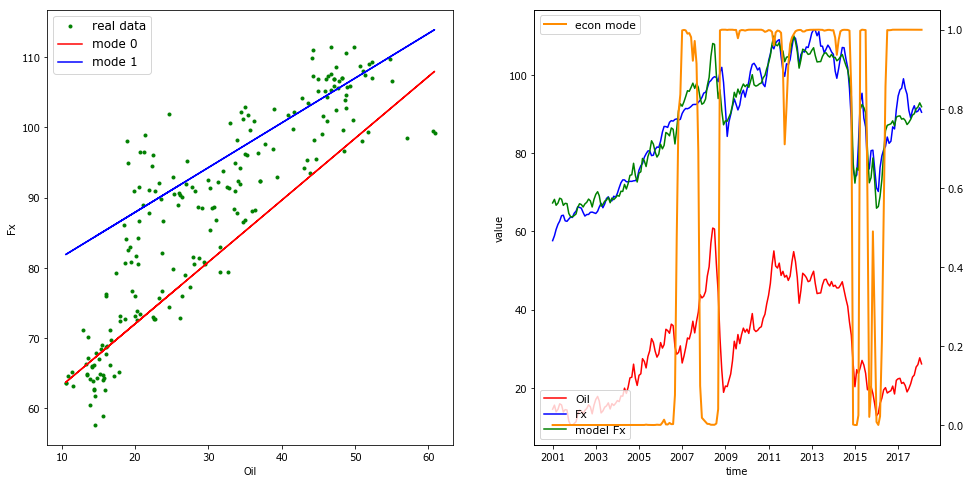

In [ ]:
plot_modes(method='L-BFGS-B', index='2001-2018', maxiter=10000)

параметры модели на данных 2001-2018 и 2001-2014

In [ ]:
names2 = ['a0', 'b0', 'a1', 'b1', 'p_01', 'p_10', 'sigma']

ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')

Y = np.array(raw_data.loc[ind1].Fx)
X = np.array(raw_data.loc[ind1].Oil)

rez2_2001_2018 = opt.minimize(NLF_model2,
                              np.append(rez1_2001_2018.x, [0.01, 0.02, 1]),
                              args=(X, Y),
                              method='Nelder-Mead', jac=False, options={'maxiter':10000})

# with printoptions(precision=6, suppress=True):
#     print(rez1_2001_2018.x)
#     print(rez2_2001_2018.x)

ind2 = ind1 & (raw_data.Date <= pd.to_datetime('01.08.2014',  format = '%d.%m.%Y'))

Y = np.array(raw_data.loc[ind2].Fx)
X = np.array(raw_data.loc[ind2].Oil)

# rez2_2001_2014 = opt.minimize(NLF_model2,
#                               np.append(rez1_2001_2014.x, [0.01, 0.02, 1, 1]),
#                               args=(X, Y),
#                               method='L-BFGS-B', jac=False, options={'maxiter':10000},   
#                               bounds=((0, None), 
#                                       (0, None), 
#                                       (0, None), 
#                                       (0, None), 
#                                       (0, 1), 
#                                       (0, 1), 
#                                       (0, None), 
#                                       (0, None)))
rez2_2001_2014 = opt.minimize(NLF_model2,
                              np.append(rez1_2001_2014.x, [0.01, 0.02, 1]),
                              args=(X, Y),
                              method='Nelder-Mead', jac=False, options={'maxiter':10000})

# with printoptions(precision=6, suppress=True):
#     print(rez1_2001_2014.x)
#     print(rez2_2001_2014.x)
    
pd.DataFrame(np.column_stack([np.append(rez1_2001_2018.x, [np.nan, np.nan, np.nan]),
                              rez2_2001_2018.x, 
                              np.append(rez1_2001_2014.x, [np.nan, np.nan, np.nan]),
                              rez2_2001_2014.x]), 
             index=names2, columns=['2001-2018 (1)', '2001-2018 (2)', '2001-2014 (1)', '2001-2014 (2)'])

C:\Users\gpbu5947\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log


,2001-2018 (1),2001-2018 (2),2001-2014 (1),2001-2014 (2)
a0,0.910827,0.880172,0.932188,0.901611
b0,53.654089,54.421046,52.585146,53.109939
a1,0.672893,0.636482,0.684472,0.652938
b1,74.088176,75.182186,73.551467,74.401953
p_01,NaN,0.043893,NaN,0.025166
p_10,NaN,0.036500,NaN,0.024171
sigma,NaN,3.946067,NaN,3.521795


результаты на данных 2001-2018 и 2001-2014

2001-2018 horizon:
2001-2018 params LH: 602.5266422395052
2001-2014 params LH: 608.4326406619182

2001-2014 horizon:
2001-2018 params LH: 459.40711322758676
2001-2014 params LH: 455.1658503559064


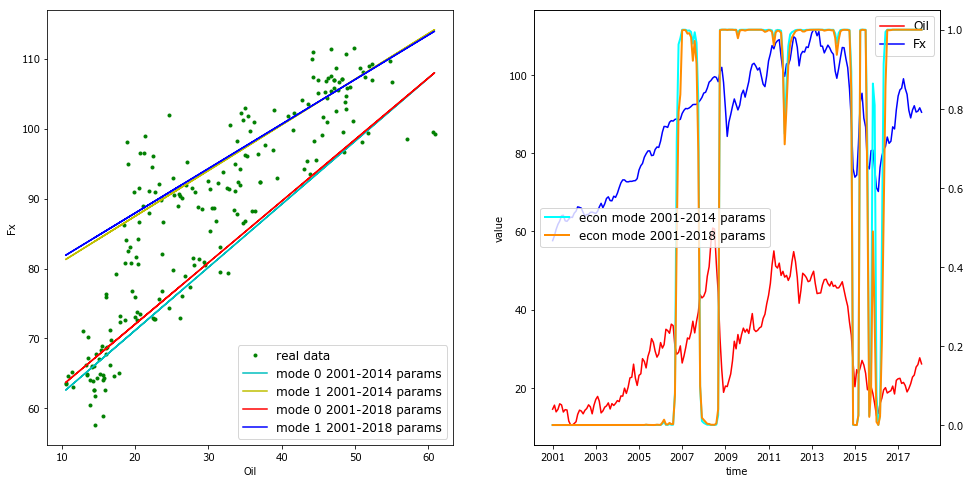

In [ ]:
ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')

Y = np.array(raw_data.loc[ind1].Fx)
X = np.array(raw_data.loc[ind1].Oil)

print('2001-2018 horizon:')
print('2001-2018 params LH:', NLF_model2(rez2_2001_2018.x, X, Y))
print('2001-2014 params LH:', NLF_model2(rez2_2001_2014.x, X, Y))

print()

ind2 = ind1 & (raw_data.Date <= pd.to_datetime('01.08.2014',  format = '%d.%m.%Y'))

Y = np.array(raw_data.loc[ind2].Fx)
X = np.array(raw_data.loc[ind2].Oil)

print('2001-2014 horizon:')
print('2001-2018 params LH:', NLF_model2(rez2_2001_2018.x, X, Y))
print('2001-2014 params LH:', NLF_model2(rez2_2001_2014.x, X, Y))

ind1 = raw_data.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')

Y = np.array(raw_data.loc[ind1].Fx)
X = np.array(raw_data.loc[ind1].Oil)

plot_data = raw_data[ind1].copy()
plot_data.set_index('Date', inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
plt.figure(figsize=(8,8))
axes[0].plot(plot_data.Oil, plot_data.Fx,'g.', label='real data')

axes[0].plot(plot_data.Oil, plot_data.Oil * rez2_2001_2014.x[0] + rez2_2001_2014.x[1], 
             'c-', label = 'mode 0 2001-2014 params')
axes[0].plot(plot_data.Oil, plot_data.Oil * rez2_2001_2014.x[2] + rez2_2001_2014.x[3], 
             'y-', label = 'mode 1 2001-2014 params')
axes[0].plot(plot_data.Oil, plot_data.Oil * rez2_2001_2018.x[0] + rez2_2001_2018.x[1], 
             'r-', label = 'mode 0 2001-2018 params')
axes[0].plot(plot_data.Oil, plot_data.Oil * rez2_2001_2018.x[2] + rez2_2001_2018.x[3], 
             'b-', label = 'mode 1 2001-2018 params')

axes[0].set_xlabel('Oil')
axes[0].set_ylabel('Fx')

axes[0].legend(loc=0, fontsize=12)

axes[1].plot(plot_data.Oil, 'r-', label='Oil')
axes[1].plot(plot_data.Fx, 'b-', label='Fx')
axes[1].set_xlabel('time')
axes[1].set_ylabel('value')
axes[1].legend(loc='best', fontsize=12)

axes[1] = axes[1].twinx()

axes[1].plot(plot_data.index, model2(rez2_2001_2014.x, X, Y)[:,1],
                     color='cyan',lw=2, label='econ mode 2001-2014 params')
axes[1].plot(plot_data.index, model2(rez2_2001_2018.x, X, Y)[:,1],
                     color='darkorange',lw=2, label='econ mode 2001-2018 params')

axes[1].legend(loc='best', fontsize=12)

plt.show()

##### Третий этап - выбор глубины используемых данных для модели приращений.

In [ ]:
raw_data_2 = raw_data.copy()

In [ ]:
for sh in range(1,25):
    raw_data_2['dFx_m' + str(sh)] = raw_data_2.dFx.shift(sh)
    raw_data_2['dOil_m' + str(sh)] = raw_data_2.dOil.shift(sh)
raw_data_2['const']=1

In [ ]:
ind = raw_data_2.Date >= pd.to_datetime('01.01.2001',  format = '%d.%m.%Y')

max_depth = 12

Scaler = preprocessing.StandardScaler()

dtfrm = Scaler.fit_transform(raw_data_2.loc[ind, raw_data_2.columns[1:]].copy())
dtfrm = pd.DataFrame(dtfrm)
dtfrm.columns = raw_data_2.columns[1:]
dtfrm['Date'] = raw_data_2.loc[ind, 'Date']

p-value однофакторных регрессий. Можно видеть, что приращения курса месяц назад и приращения нефти месяц назад имеют низкий индивидуальный p-value, что хорошо

In [ ]:
for sh in range(1,max_depth+1):
    tmp = scipy.stats.linregress(dtfrm['dFx_m' + str(sh)], dtfrm['dFx'])
    print('dFx_m' + str(sh) + ' ', "{:2,.2%}".format(tmp.pvalue))
    
    tmp = scipy.stats.linregress(dtfrm['dOil_m' + str(sh)], dtfrm['dFx'])
    print('dOil_m' + str(sh), "{:2,.2%}".format(tmp.pvalue))
    
    print()

dFx_m1  0.00%
dOil_m1 0.04%

dFx_m2  88.56%
dOil_m2 1.03%

dFx_m3  0.03%
dOil_m3 71.43%

dFx_m4  0.00%
dOil_m4 84.20%

dFx_m5  1.92%
dOil_m5 33.64%

dFx_m6  92.74%
dOil_m6 31.92%

dFx_m7  75.14%
dOil_m7 17.04%

dFx_m8  57.81%
dOil_m8 79.35%

dFx_m9  34.33%
dOil_m9 95.34%

dFx_m10  13.12%
dOil_m10 48.89%

dFx_m11  5.37%
dOil_m11 42.28%

dFx_m12  3.04%
dOil_m12 16.64%

